In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
comments= pd.read_csv('/content/UScomments.csv',error_bad_lines = False , engine='python')
comments.head()

<ipython-input-17-eb30ea00bbb3>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments= pd.read_csv('/content/UScomments.csv',error_bad_lines = False , engine='python')
Skipping line 24537: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 41589: ',' expected after '"'
Skipping line 74586: ',' expected after '"'
Skipping line 114465: ',' expected after '"'
Skipping line 141800: ',' expected after '"'
Skipping line 142496: ',' expected after '"'
Skipping line 162506: ',' expected after '"'
Skipping line 189732: ',' expected after '"'
Skipping line 195584: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 216199: NULL byte detected. This byte cannot be processed in Python's native csv library at the m

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [ ]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [ ]:
comments[comments.isnull()]

,video_id,comment_text,likes,replies
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
691395,NaN,NaN,NaN,NaN
691396,NaN,NaN,NaN,NaN
691397,NaN,NaN,NaN,NaN
691398,NaN,NaN,NaN,NaN


In [ ]:
comments[comments['video_id'].isnull()]


,video_id,comment_text,likes,replies


In [ ]:
comments[comments['comment_text'].isnull()]

,video_id,comment_text,likes,replies
76134,7YAAyUFL1GQ,NaN,0,0
215218,KUCHBBCj77I,NaN,0,0
234226,KUCHBBCj77I,NaN,0,0
306019,s3Hk_lDw5yo,NaN,0,0
332811,zrOHeEA14kQ,NaN,0,0
357506,zmg9tVaMVd4,NaN,0,0
379582,zmg9tVaMVd4,NaN,0,0
403013,9eea7_7OBZQ,NaN,0,0
425238,6l5P7jHUcjI,NaN,0,0
436348,IQisUbBljW0,NaN,0,0


In [ ]:
comments['video_id']==0

0         False
1         False
2         False
3         False
4         False
          ...  
691395    False
691396    False
691397    False
691398    False
691399    False
Name: video_id, Length: 691400, dtype: bool

In [ ]:
comments[comments['likes']==0]

,video_id,comment_text,likes,replies
131072,sD6RIeNP41I,fuck ggg and the judges Canelo won,0,0
131073,sD6RIeNP41I,Good for Teddy,0,0
131074,sD6RIeNP41I,Canelo got outboxed,0,0
131075,sD6RIeNP41I,Wow,0,0
131076,sD6RIeNP41I,When you're woke asf lol,0,0
...,...,...,...,...
691393,EoejGgUNmVU,<3,0,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [ ]:
!pip install textblob

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from textblob import TextBlob
comments= pd.read_csv('/content/UScomments.csv',on_bad_lines='skip', engine='python')
comments.dropna(inplace=True)
comments.head(6)
TextBlob('Logan paul it is yo big day').sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [ ]:
polarity=[]
for comment in comments ['comment_text']:
    try: polarity.append(TextBlob(comment).sentiment.polarity)
    except:polarity.append(0)
comments['polarity'] = polarity
comments.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


import numpy as np
from google.colab import autoviz
df_541845981901285189 = autoviz.get_df('df_541845981901285189')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_541845981901285189, *['comment_text'], **{})
chart

import numpy as np
from google.colab import autoviz
df_696919271958687371 = autoviz.get_df('df_696919271958687371')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_696919271958687371, *['likes'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1346978121905898922 = autoviz.get_df('df_1346978121905898922')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_1346978121905898922, *['comment_text', 'likes'], **{})
chart

In [ ]:
filter1 =comments['polarity'] == 1
comment_positive=comments[filter1]
comment_positive.head(5)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


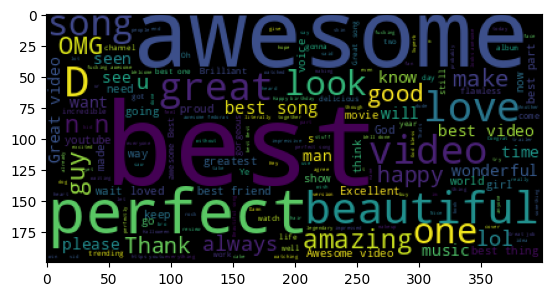

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
set(STOPWORDS)
total_comments_positive = ' '.join(comment_positive['comment_text'])
wordcloud = WordCloud(stopwords= set(STOPWORDS)).generate(total_comments_positive)
plt.imshow(wordcloud)

In [ ]:
!pip install emoji==2.2.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=fb698bea5cc6377ef3044c775d89fd3f7ef9ccc8f7e4f625d1332a8e57589d2f
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [20]:
import emoji
all_emojis_list=[]
for comment in comments['comment_text'].dropna():
  for char in comment:
    if char in emoji.EMOJI_DATA:
      all_emojis_list.append(char)


In [21]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [27]:
from collections import Counter
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [31]:
emoji=[Counter(all_emojis_list).most_common(10)[i][0] for i in range (10)]
freq=[Counter(all_emojis_list).most_common(10)[i][1] for i in range (10)]
emoji
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [32]:
import plotly.graph_objs as go
from plotly.offline import iplot
trace=go.Bar(x=emoji, y=freq)
iplot([trace])